## Holt Winter's Method
## @author - Shashwat Vaibhav

For our analysis, we usually have 3 exponential smoothing, namely:<br/>
1.<b>Single Exponential Smoothing:</b> ${\alpha}$ <br/>
2.<b>Double Exponential Smoothing or Holt's Method:</b> ${\alpha}, {\beta}$ --captures trend<br/>
3.<b>Triple Exponential Smoothing or Holt's Winter Method:</b> ${\alpha}, {\beta}, {\gamma}$ --captures seasonality as well<br/>

In [73]:
## Let's import the requisite libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
## Let's load the dataset
airline_data = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)
airline_data.dropna()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [75]:
##  Let's have some descriptive stats
airline_data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [76]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [77]:
### So no null values, good ---> or else we could have used dropna()
airline_data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [78]:
## Let's set freq to start of the month.... But how??
airline_data.index.freq = 'MS'
airline_data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [79]:
### Change has been reflected
airline_data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### `Simple Exponential Smoothing. Parameter - ` ${\alpha}$

In [25]:
## importing requisite library 
## !pip install statsmodels --already installed
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as SES

In [80]:
span = 12 
##  12 months in a year
param_alpha = 2/(span+1)

In [81]:
## add a column for exponential weighted moving average AVGewma_12
## first let's do it using inbuilt pandas functions
airline_data['AVGewma_12'] = airline_data['Thousands of Passengers'].ewm(alpha = param_alpha, adjust= False).mean()
airline_data.head()

,Thousands of Passengers,AVGewma_12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [82]:
## Now we will produce same result using statsmodels
model = SES(airline_data['Thousands of Passengers'])
## instamtiating the model with series data

In [83]:
## fitting now
## smoothing value --> param_alpha
model_fitted = model.fit(smoothing_level= param_alpha, optimized = False)
## model.fit() returns a Holt Winters wrapper object

In [84]:
## grab the fitted values 
model_fitted.fittedvalues.shift(-1) ##--> why shifted?? we get repeated values for first 2 instances
airline_data['Simple Exp Smoothing'] = model_fitted.fittedvalues.shift(-1) 

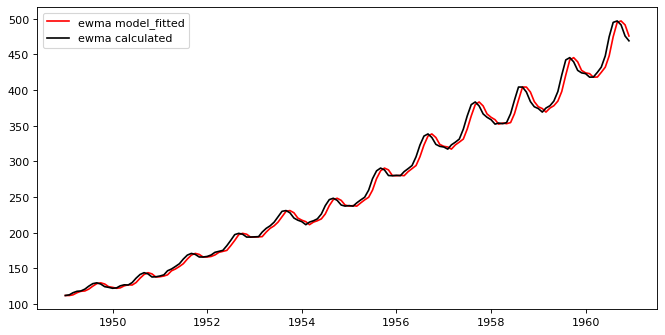

In [85]:
## Let's see how values obtained in airline_data['AVGewma_12'] differs with respect to fitted model's values
plt.figure(figsize = size, dpi = 80)
plt.plot(model_fitted.fittedvalues, color='red', label= 'ewma model_fitted')
plt.plot(airline_data['AVGewma_12'], color='black', label = 'ewma calculated' )
plt.legend()

### `Double Exponential Smoothing (Holt's Method). Parameters - ` ${\alpha}, {\beta}$
#### Captures trend

In [86]:
## Let's import requisite libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES

<AxesSubplot:xlabel='Month'>

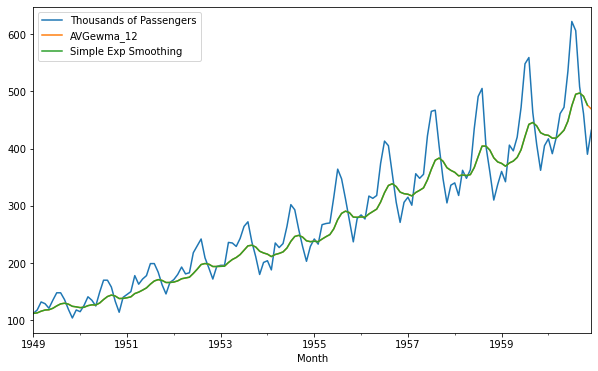

In [87]:
airline_data.plot(figsize=(10,6))

#### NOTE - If a time series shows straight line slope for trend, we'd use `additive` adjustment and if it shows exponential slope for trend, we'd use `multiplicative` adjustment

In [88]:
model = ES(airline_data['Thousands of Passengers'], trend= 'add')
model_fitted = model.fit()
airline_data['Double Exp Smoothing'] = model_fitted.fittedvalues.shift(-1)

In [89]:
airline_data.head()

,Thousands of Passengers,AVGewma_12,Simple Exp Smoothing,Double Exp Smoothing
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263


<AxesSubplot:xlabel='Month'>

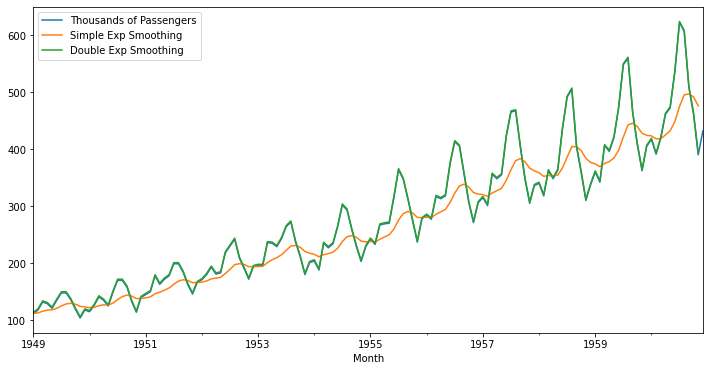

In [90]:
airline_data[['Thousands of Passengers', 'Simple Exp Smoothing', 'Double Exp Smoothing']].plot(figsize=(12,6))

#### From the plots above, it is clear that double exponential smoothing falls very close to the real data

<AxesSubplot:xlabel='Month'>

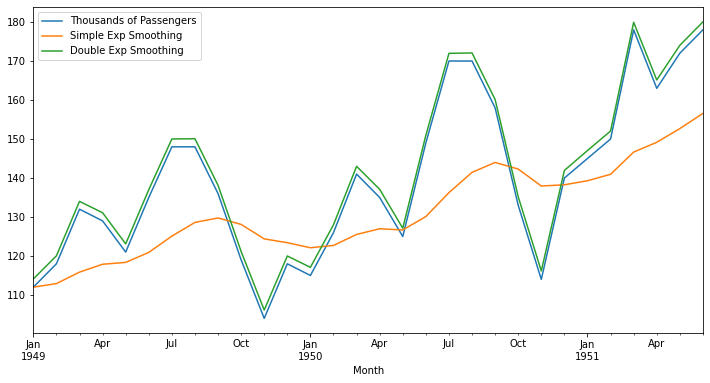

In [91]:
## Let's see more closely
airline_data[['Thousands of Passengers', 'Simple Exp Smoothing', 'Double Exp Smoothing']].iloc[:30].plot(figsize=(12,6))

### `Triple Exponential Smoothing (Holt Winters method). Paramters -` ${\alpha}, {\beta}, {\gamma}$

In [98]:
model = ES(airline_data['Thousands of Passengers'], trend='add', seasonal='add', seasonal_periods=12)
fitted_model= model.fit()
airline_data['Triple Exp Smoothing'] = fitted_model.fittedvalues

In [99]:
airline_data.columns

Index(['Thousands of Passengers', 'AVGewma_12', 'Simple Exp Smoothing',
       'Double Exp Smoothing', 'Triple Exp Smoothing'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

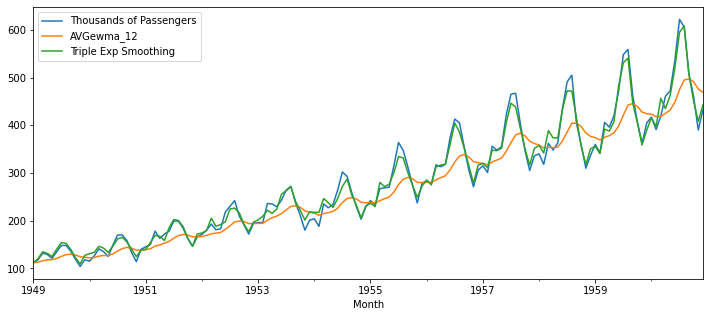

In [100]:
airline_data[['Thousands of Passengers', 'AVGewma_12', 'Triple Exp Smoothing']].plot(figsize=(12,5))

<AxesSubplot:xlabel='Month'>

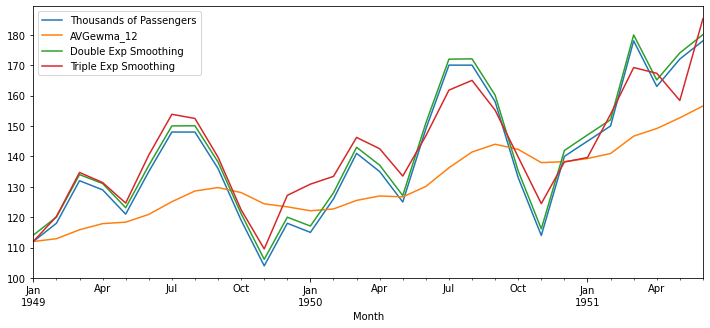

In [101]:
##  let's compare the plots with double exponential smoothing
airline_data[['Thousands of Passengers', 'AVGewma_12','Double Exp Smoothing', 'Triple Exp Smoothing']].iloc[:30].plot(figsize=(12,5))

#### Clearly wih additive adjustment, double exponential smoothing works better than Holt Winters exponential smoothing